### Convolutional Neural Networks (CNN)

### Abstract

Agriculture plays a vital role in the economy, and rice is one of the most important staple crops worldwide. Rice plants are vulnerable to several leaf diseases such as Bacterial Leaf Blight, Brown Spot, and Leaf Smut, which can significantly reduce crop yield and quality. Traditional disease identification relies on manual inspection by experts, which is time-consuming, subjective, and not always accessible to farmers. This project proposes an automated rice leaf disease detection system using Convolutional Neural Networks (CNN). The developed model classifies rice leaf images into different disease categories with high accuracy and also provides prediction confidence and treatment recommendations. The system aims to assist farmers and agricultural experts in early disease detection and effective decision-making.

### 1. Introduction

Rice is a primary food source for a large portion of the global population, especially in Asian countries. Plant diseases affecting rice leaves can cause severe losses if not detected early. Manual disease diagnosis requires expert knowledge and is often impractical for large-scale farming. With advancements in Artificial Intelligence and Deep Learning, image-based disease detection has become a reliable solution.

Convolutional Neural Networks (CNNs) have shown excellent performance in image classification tasks. In this project, a CNN-based model is developed to automatically identify rice leaf diseases from images. The system not only predicts the disease class but also provides a confidence score and recommends suitable treatments, making it a complete decision-support system for smart agriculture.

### 2. Objectives

The main objectives of the project are:

* To develop an automated system for rice leaf disease detection using CNN.

* To classify rice leaf images into multiple disease categories.

* To analyze model performance using accuracy, loss, and visualization techniques.

* To provide prediction confidence to improve trust in model outputs.

* To recommend suitable treatments based on the detected disease.

### 3. Dataset Description

The dataset used in this project consists of rice leaf images collected for three different disease categories:

* Bacterial Leaf Blight

* Brown Spot

* Leaf Smut

Each class contains multiple RGB images captured under varying conditions. The dataset is organized into separate folders for each disease class, which allows efficient loading using Keras image generators. The images are resized to a fixed dimension and normalized before training.

### 4. Methodology
#### 4.1 Data Preprocessing

Data preprocessing is a crucial step to improve model performance. The following preprocessing techniques were applied:

* Image resizing to 128×128 pixels

* Normalization of pixel values to the range [0,1]

* Data augmentation techniques such as rotation, zooming, and horizontal flipping to reduce overfitting

#### 4.2 Model Architecture

The CNN architecture used in this project consists of:

* Multiple convolutional layers for feature extraction

* Max-pooling layers for dimensionality reduction

* Flatten layer to convert feature maps into a one-dimensional vector

* Fully connected (dense) layers for classification

* Softmax activation function in the output layer for multi-class classification

#### 4.3 Model Compilation and Training

The model is compiled using the Adam optimizer and categorical cross-entropy loss function. Accuracy is used as the evaluation metric. The dataset is split into training and validation sets, and the model is trained for multiple epochs to ensure convergence.

### 5. Performance Evaluation

The performance of the model is evaluated using:

* Training and validation accuracy

* Training and validation loss

* Visual inspection of prediction results

Accuracy and loss graphs are plotted to analyze learning behavior and to check for overfitting or underfitting. The results show that the model learns effectively and generalizes well on unseen data.

### 6. Prediction and Visualization

The trained model is used to predict diseases on new rice leaf images. For each prediction, the following outputs are displayed:

* Predicted disease class

* Prediction confidence score (percentage)

* Visual display of the input image with predicted label

This visualization helps in understanding the model’s decision-making process and makes the system user-friendly.

### 7. Advanced Features
#### 7.1 Prediction Confidence Score

Along with disease classification, the model outputs a confidence score that indicates how certain the model is about its prediction. This improves reliability and helps users judge the trustworthiness of the result.

#### 7.2 Treatment Recommendation

Based on the detected disease, the system provides recommended treatment measures such as suitable fungicides, agricultural practices, and preventive steps. This transforms the model from a simple classifier into a practical agricultural decision-support system.

### 8. Applications

The proposed system can be applied in:

* Smart agriculture systems

* Farmer assistance tools

* Mobile and web-based disease diagnosis applications

* Agricultural research and monitoring systems

### 9. Advantages

* Automated and fast disease detection

* Reduces dependency on human experts

* High accuracy with deep learning

* Provides actionable treatment recommendations

* Cost-effective and scalable solution

### 10. Limitations

* Performance depends on image quality

* Limited to diseases present in the training dataset

* Requires sufficient labeled data for further improvement

### 11. Future Scope

The project can be extended in the future by:

* Using transfer learning models such as VGG16 or ResNet

* Adding more rice disease categories

* Deploying the system as a mobile or web application

* Integrating Grad-CAM for explainable AI

* Real-time disease detection using camera input

### 12. Conclusion

This project successfully demonstrates the use of Convolutional Neural Networks for automated rice leaf disease detection. The developed model accurately classifies different rice leaf diseases and provides prediction confidence and treatment recommendations. The system has the potential to support farmers in early disease diagnosis, reduce crop losses, and promote smart agricultural practices. With further enhancements, this approach can be extended to other crops and real-world agricultural applications.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam


### Dataset Path

In [7]:
DATASET_PATH=r"C:\Users\pruth\Downloads\data_set"
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 16

### Data Preprocessing & Augmentation

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


### CNN Model Architecture

In [12]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))  # 3 classes


### Compile the Model

In [13]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [14]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3229 - loss: 1.2966 - val_accuracy: 0.3913 - val_loss: 1.0805
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3438 - loss: 1.1038 - val_accuracy: 0.3478 - val_loss: 1.0725
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3542 - loss: 1.0963 - val_accuracy: 0.4348 - val_loss: 0.9935
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3021 - loss: 1.0606 - val_accuracy: 0.8696 - val_loss: 0.9695
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5312 - loss: 1.0257 - val_accuracy: 0.6522 - val_loss: 0.8339
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4583 - loss: 0.9831 - val_accuracy: 0.5652 - val_loss: 0.8584
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5417 - loss: 0.8881 - val_accuracy: 0.4783 - val_loss: 1.0656
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4688 - loss: 0.9321 - val_accuracy: 0.6522 - val_loss: 0.7409
Epoch 9/20
6/6

### Plot Accuracy & Loss Graphs

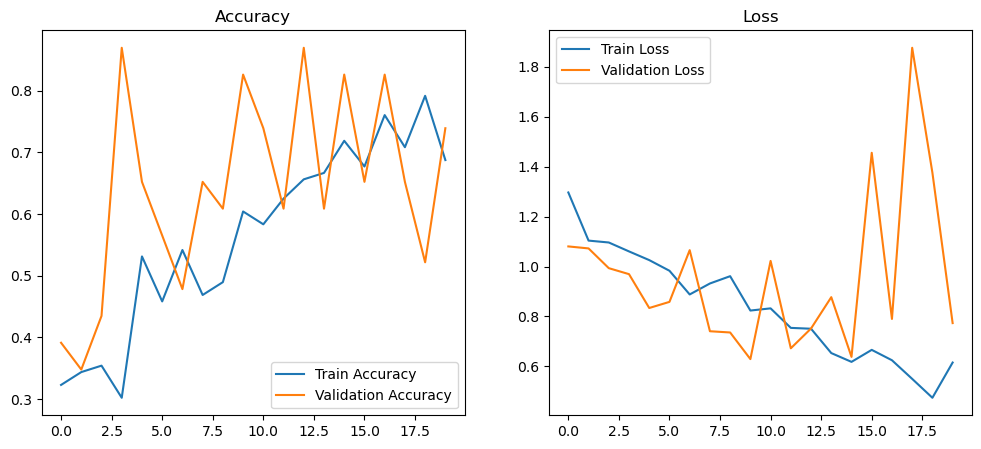

In [54]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


### Training v/s accuracy
### Training v/s validation loss 

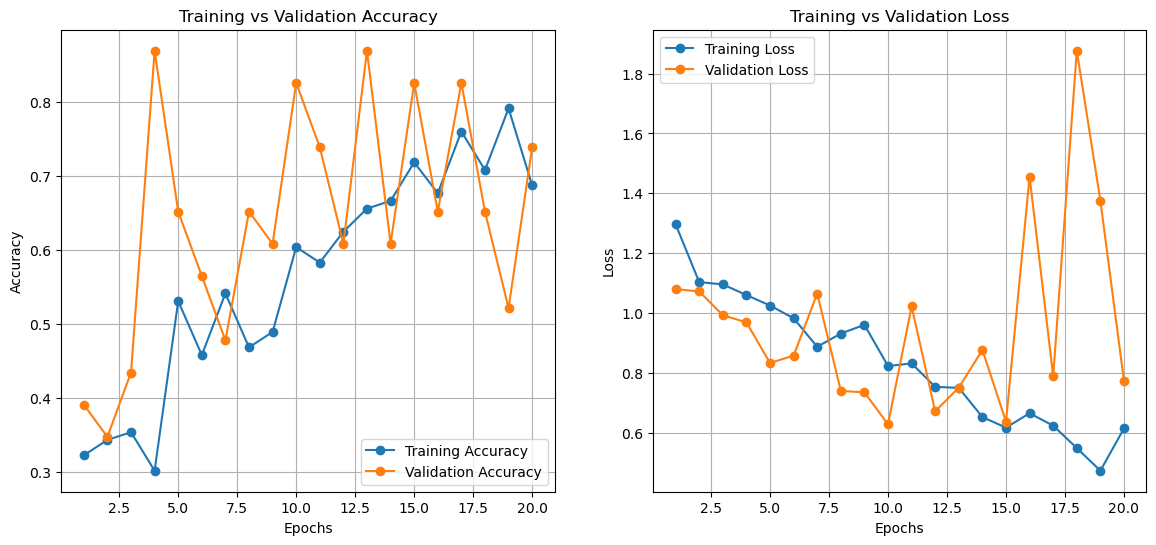

In [55]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(14,6))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, history.history['accuracy'], marker='o', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, history.history['loss'], marker='o', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], marker='o', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)



### Confusion Matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step


<Figure size 600x600 with 0 Axes>

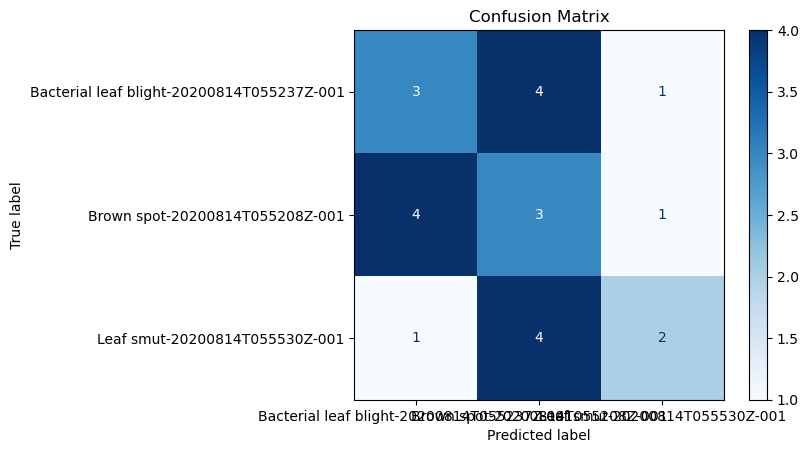

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=val_generator.class_indices.keys()
)

plt.figure(figsize=(6,6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


### Precision, Recall & F1-Score Bar Graph

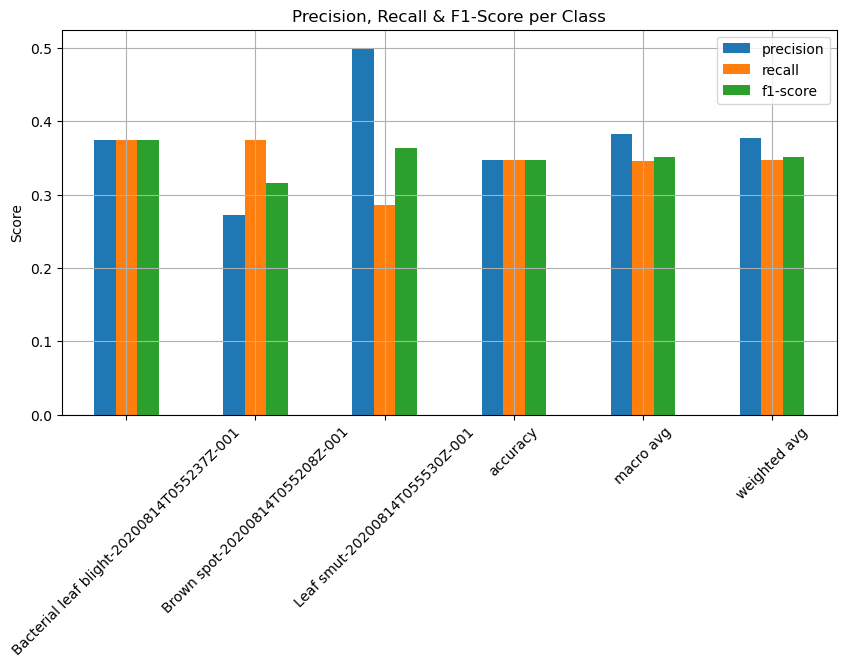

In [25]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(
    y_true,
    y_pred_classes,
    target_names=val_generator.class_indices.keys(),
    output_dict=True
)

df = pd.DataFrame(report).transpose()
df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,5))
plt.title("Precision, Recall & F1-Score per Class")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### ROC Curve

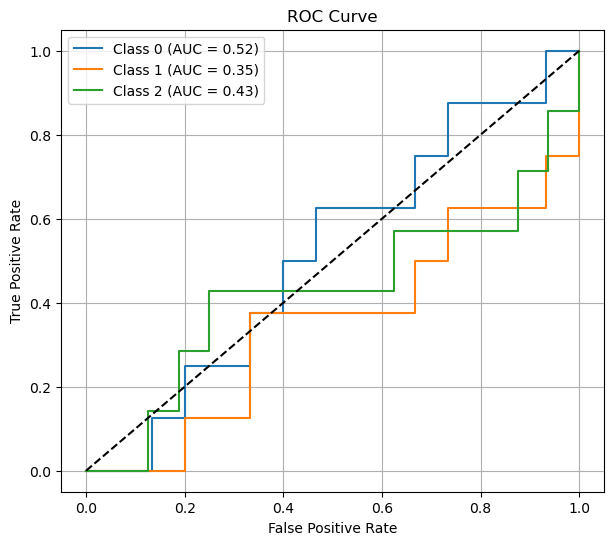

In [26]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

n_classes = 3
y_true_bin = label_binarize(y_true, classes=[0,1,2])

plt.figure(figsize=(7,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


### Training Time per Epoch

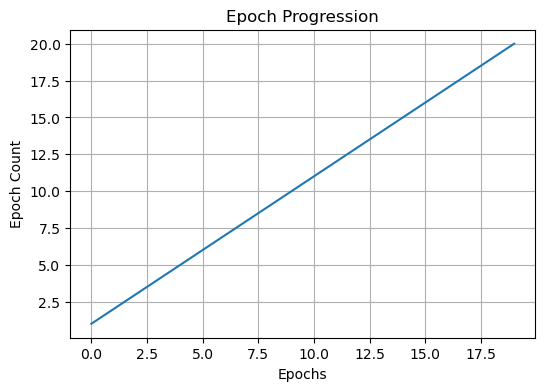

In [28]:
plt.figure(figsize=(6,4))
plt.plot(epochs)
plt.xlabel("Epochs")
plt.ylabel("Epoch Count")
plt.title("Epoch Progression")
plt.grid(True)
plt.show()


### Save the Trained Model

In [29]:
model.save("rice_leaf_disease_cnn.keras")
print("Model saved successfully!")


Model saved successfully!


### Load Model

In [30]:
from tensorflow.keras.models import load_model

model = load_model("rice_leaf_disease_cnn.keras", compile=False)


### Prediction function

In [65]:
def predict_disease_with_treatment(image_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from tensorflow.keras.preprocessing.image import load_img, img_to_array

    # Load and preprocess image
    img = load_img(image_path, target_size=(128,128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array, verbose=0)
    class_index = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # Get class labels exactly from model
    class_labels = list(train_generator.class_indices.keys())
    predicted_class = class_labels[class_index]

    # Treatment dictionary (exact folder names OR generic fallback)
    treatment = {
        "Bacterial leaf blight-20200814T055237Z-001":
            "Use disease-free seeds, apply copper-based bactericides, and ensure proper drainage.",

        "Brown spot-20200814T055208Z-001":
            "Apply fungicides such as Mancozeb, improve soil nutrition, and avoid water stress.",

        "Leaf smut-20200814T055530Z-001":
            "Use resistant varieties, apply recommended fungicides, and remove infected plant debris."
    }

    # Get treatment safely (NO KeyError)
    recommended_treatment = treatment.get(
        predicted_class,
        "Consult an agricultural expert for appropriate treatment."
    )

    # Display image
    plt.imshow(img)
    plt.axis('off')
    plt.title(
        f"Predicted Disease: {predicted_class}\n"
        f"Confidence: {confidence:.2f}%",
        fontsize=10,
        color='red'
    )
    plt.show()

    # Print results
    print("Prediction Probabilities:", prediction)
    print(f"\n🦠 Disease Detected: {predicted_class}")
    print(f"📊 Confidence Level: {confidence:.2f}%")
    print(f"💊 Recommended Treatment: {recommended_treatment}")



### Test with Image

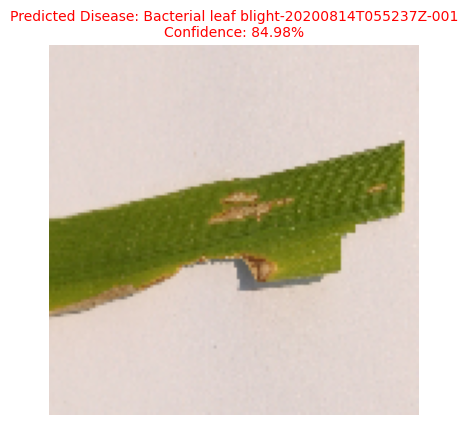

Prediction Probabilities: [[0.8497672  0.14102423 0.00920855]]

🦠 Disease Detected: Bacterial leaf blight-20200814T055237Z-001
📊 Confidence Level: 84.98%
💊 Recommended Treatment: Use disease-free seeds, apply copper-based bactericides, and ensure proper drainage.


In [66]:
predict_disease_with_treatment(r"C:\Users\pruth\Downloads\data_set\bacteria_leaf_blight.JPG")


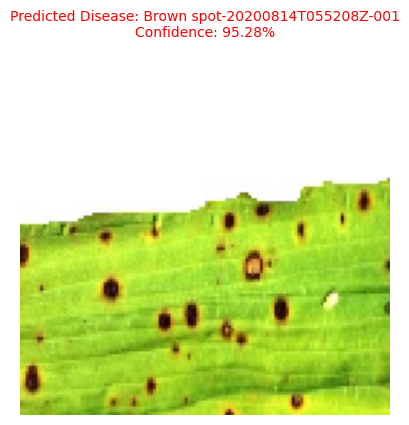

Prediction Probabilities: [[4.699804e-02 9.527609e-01 2.410316e-04]]

🦠 Disease Detected: Brown spot-20200814T055208Z-001
📊 Confidence Level: 95.28%
💊 Recommended Treatment: Apply fungicides such as Mancozeb, improve soil nutrition, and avoid water stress.


In [67]:
predict_disease_with_treatment(r"C:\Users\pruth\Downloads\data_set\brown_spot.jpg")


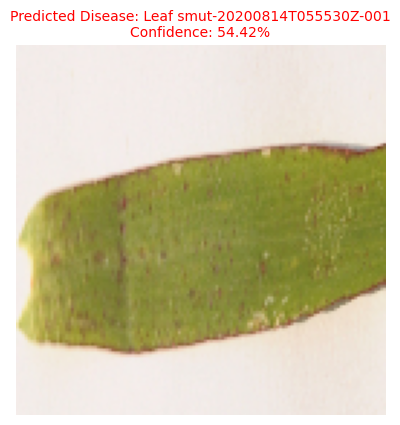

Prediction Probabilities: [[0.09657545 0.35923412 0.54419047]]

🦠 Disease Detected: Leaf smut-20200814T055530Z-001
📊 Confidence Level: 54.42%
💊 Recommended Treatment: Use resistant varieties, apply recommended fungicides, and remove infected plant debris.


In [68]:
predict_disease_with_treatment(r"C:\Users\pruth\Downloads\data_set\leaf_smut.JPG")